# PCA from Scratch

In this notebook, you will need to implement PCA in order to visualize points from a four-dimensional space on a 2D plot.

Run the cells of this notebook one-by-one, occasionally implementing some parts as instructed.

In [ ]:
import numpy as np

## Loading the data

In this notebook, you will work with the famous $\texttt{iris}$ dataset.

The data set consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

We will first load the data.

More information on the dataset? See [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Columns of X represent examples
X = iris.data.transpose()
y = iris.target

Each example in the dataset is a point in a four-dimensional space, which makes it impossible to plot the data.

In [ ]:
X.shape

(4, 150)

Let's reduce the dimensionality of the data with the help of PCA.

## Implementing PCA

Iimplement the PCA procedure by ompleting the code below. 

You can consult the slides from the lecture and / or practical session to review the PCA algorithm.

In [ ]:
def pca(X, n_components=2):

  # 1. Center the data 
  # (subtract each feature's mean from their values)
  m,n = X.shape
  X_centered = X - np.mean(X , axis = 1).reshape(m, 1)

  # 2. Estimate the covariance matrix
  S = np.cov(X_centered)

  # 3. Find eigenvectors and eigenvalues of the covariance matrix
  eigen_values , eigen_vectors = np.linalg.eig(S)

  # 4. Sort eigenvalues in the descending order
  # Don't forget to re-order the corresponding eigenvectors!
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalues = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # 5. Select the first n_components eigenvectors (principle components)
  eigenvector_subset = sorted_eigenvectors[:,0:n_components]

  # 6. Project the data onto the first n_components principle components
  X_proj = np.matmul(eigenvector_subset.transpose(), X_centered)

  return X_proj

Now, let's try our function out! Project the $\texttt{iris}$ data onto a 2D plane.

In [ ]:
X_proj = pca(X)

Now, visualize the projected data with a scatter plot! What can you say about the points corresponding to different iris types?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

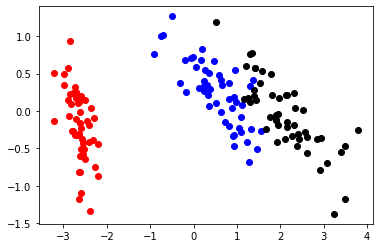

In [ ]:
for i, x in enumerate(X_proj.transpose()):

  # Select color depending on the class
  # (iris type)

  if y[i] == 0:
    c = 'red'
  elif y[i] == 1:
    c = 'blue'
  else:
    c = 'black'

  # Plot the example
  
  plt.scatter(x[0], x[1], color=c)